In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

Changed Path to Working directory

In [54]:
import os
print("Current working directory:", os.getcwd())
os.chdir(r"D:\Labmentix\emipredict_ai")
print("Now in:", os.getcwd())

Current working directory: C:\Users\artis
Now in: D:\Labmentix\emipredict_ai


### ***Data Extraction***

##### 1. Dataset Loading & First Look

In [2]:
df = pd.read_csv(r'emi_prediction_dataset.csv')
df.head()

C:\Users\artis\AppData\Local\Temp\ipykernel_36012\1632031548.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\Labmentix\emipredict_ai\emi_prediction_dataset.csv')


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


##### 2. Dataset Information

In [3]:
# Dataset Info
df.info() # info about the dataset column structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

##### 3. Duplicate Values

In [4]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


##### 4. Checking & Dropping rows with null values

In [5]:
df.dropna(axis = 'index', inplace = True)
df.isnull().sum()

age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

##### 5. Data Wrangling: Fixing dtypes of from object to relevant values

In [6]:
# ---- Define column groups ----
numeric_cols = [
    'age', 'years_of_employment', 'monthly_rent', 'family_size', 'dependents',
    'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities',
    'other_monthly_expenses', 'current_emi_amount', 'credit_score',
    'bank_balance', 'emergency_fund', 'requested_amount',
    'requested_tenure', 'max_monthly_emi'
]

numeric_like = [
    'age', 'monthly_salary', 'existing_loans'
]

categorical_cols = [
    'gender', 'marital_status', 'education', 'employment_type',
    'company_type', 'house_type', 'emi_scenario', 'emi_eligibility'
]

# ---- Step 1: Standardize missing values globally ----
df = df.replace(
    ['nan', 'None', 'NaN', 'N/A', 'NA', '-', '--', 'nil', 'null', 'UNKNOWN', 'Unknown', ''],
    np.nan
)

# ---- Step 2: Define helper to clean numeric-like columns ----
def clean_numeric(series):
    """
    Converts text columns with numeric-like values to floats.
    Keeps only digits, '.', and '-'.
    """
    series = series.astype(str)
    series = series.apply(lambda x: re.sub(r'[^\d\.\-]', '', x) if isinstance(x, str) else x)
    return pd.to_numeric(series, errors='coerce')

# ---- Step 3: Clean numeric-like columns ----
for col in numeric_like:
    if col in df.columns:
        df[col] = clean_numeric(df[col])

# ---- Step 4: Convert actual numeric columns ----
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# ---- Step 5: Convert categorical columns ----
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# ---- Step 6: Handle missing values ----
# Fill numeric NaNs with median
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    median_val = df[col].median()
    df.fillna({col: median_val}, inplace=True)

# Fill categorical NaNs with mode
categorical_columns = df.select_dtypes(include=['category']).columns
for col in categorical_columns:
    mode_series = df[col].mode()
    if not mode_series.empty:
        mode_val = mode_series[0]
        df.fillna({col: mode_val}, inplace=True)


# ---- Step 7: Final check ----
print("\n✅ Data Cleaning Complete!\n")
print(df.info())
print(df.head())

# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# ✅ Final check
print("Data after wrangling:")
print(df.info())
print("\nSample rows:")
print(df.head())

C:\Users\artis\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



✅ Data Cleaning Complete!

<class 'pandas.core.frame.DataFrame'>
Index: 392920 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   age                     392920 non-null  float64 
 1   gender                  392920 non-null  category
 2   marital_status          392920 non-null  category
 3   education               392920 non-null  category
 4   monthly_salary          392920 non-null  float64 
 5   employment_type         392920 non-null  category
 6   years_of_employment     392920 non-null  float64 
 7   company_type            392920 non-null  category
 8   house_type              392920 non-null  category
 9   monthly_rent            392920 non-null  float64 
 10  family_size             392920 non-null  int64   
 11  dependents              392920 non-null  int64   
 12  school_fees             392920 non-null  float64 
 13  college_fees            392920 non-n

### ***Understanding Variables***

In [7]:
# Dataset Columns
print(df.columns.tolist()) # List all column names

['age', 'gender', 'marital_status', 'education', 'monthly_salary', 'employment_type', 'years_of_employment', 'company_type', 'house_type', 'monthly_rent', 'family_size', 'dependents', 'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 'existing_loans', 'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario', 'requested_amount', 'requested_tenure', 'emi_eligibility', 'max_monthly_emi']


In [8]:
# Dataset Describe
df.describe() # Show summary statistics of numeric columns

,age,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,392920.000000,392920.000000,392920.000000,392920.000000,392920.000000,392920.000000,392920.000000,392920.000000,392920.000000,392920.00000,392920.000000,0.0,392920.000000,392920.000000,3.929200e+05,392920.000000,3.929200e+05,392920.000000,392920.000000
mean,38.877619,59466.572447,5.368702,5827.237618,2.940713,1.940713,4625.445383,4066.824290,5687.125878,12805.92767,7120.370050,NaN,4541.903186,700.866344,2.414585e+05,96772.396671,3.709108e+05,29.127708,6766.009512
std,9.300452,43259.709522,6.084106,8646.175758,1.075015,1.075015,5061.137604,7320.156014,3392.840781,6993.31759,4511.001689,NaN,7034.490476,88.498866,1.827947e+05,81358.788560,3.451783e+05,18.096302,7746.720160
min,26.000000,3967.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,600.000000,1800.00000,600.000000,NaN,0.000000,0.000000,6.100000e+03,1400.000000,1.000000e+04,3.000000,500.000000
25%,32.000000,35400.000000,1.200000,0.000000,2.000000,1.000000,0.000000,0.000000,3200.000000,7700.00000,3800.000000,NaN,0.000000,654.000000,1.048000e+05,38400.000000,1.240000e+05,15.000000,500.000000
50%,38.000000,51700.000000,3.200000,0.000000,3.000000,2.000000,3100.000000,0.000000,4900.000000,11400.00000,6000.000000,NaN,0.000000,701.000000,1.959000e+05,74000.000000,2.370000e+05,25.000000,4217.450000
75%,48.000000,72800.000000,7.200000,10600.000000,4.000000,3.000000,9000.000000,6500.000000,7400.000000,16400.00000,9300.000000,NaN,8000.000000,748.000000,3.303000e+05,130600.000000,4.950000e+05,40.000000,9792.000000
max,59.000000,499970.000000,36.000000,80000.000000,5.000000,4.000000,15000.000000,25000.000000,30300.000000,71200.00000,42900.000000,NaN,56300.000000,1200.000000,1.717300e+06,891500.000000,1.500000e+06,84.000000,91040.400000


### ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Chart - 1. Age Distribution

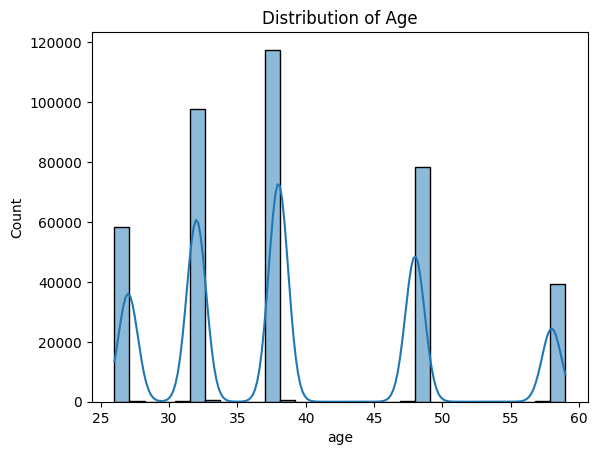

In [9]:
# 1. Distribution of Age
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()

Chart - 2. Gender Distribution

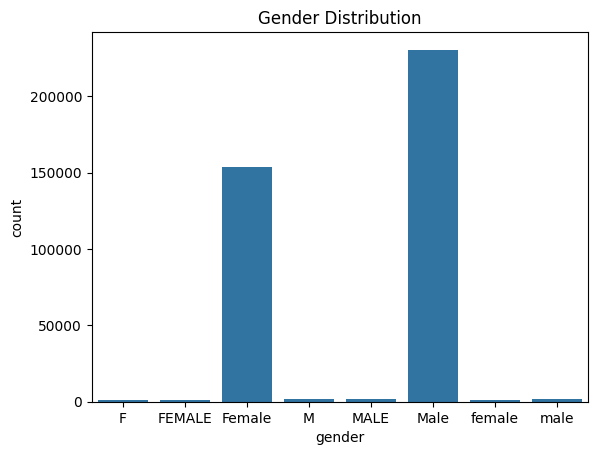

In [10]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

Chart - 3. Marital Status Distribution

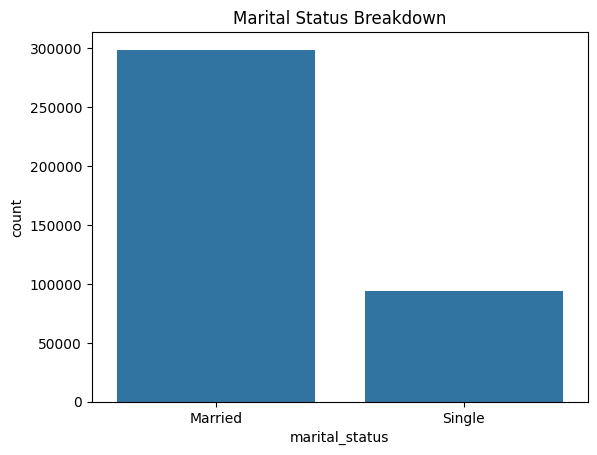

In [11]:
sns.countplot(x='marital_status', data=df)
plt.title("Marital Status Breakdown")
plt.show()

Chart - 4. Education Level Distruibution

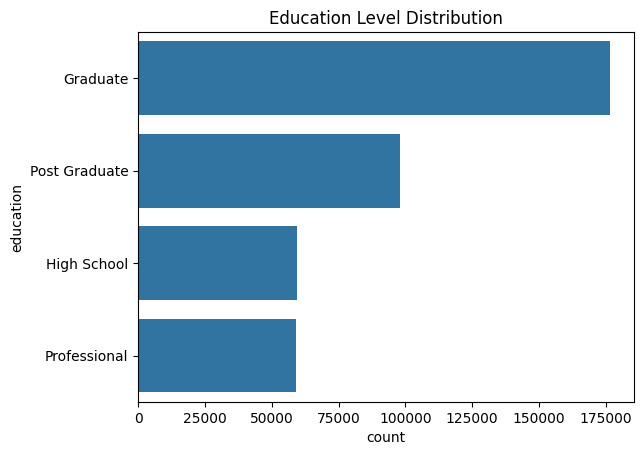

In [12]:
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title("Education Level Distribution")
plt.show()

Chart - 5. Monthly Salary Distribution

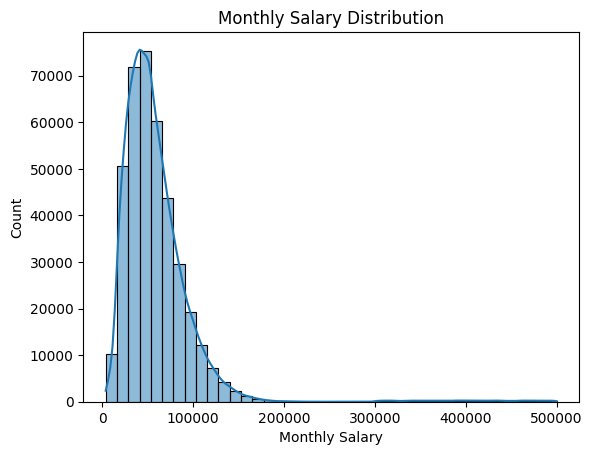

In [13]:
sns.histplot(df['monthly_salary'], bins=40, kde=True)
plt.title("Monthly Salary Distribution")
plt.xlabel("Monthly Salary")
plt.show()

Chart - 6. Employment Type vs Salary

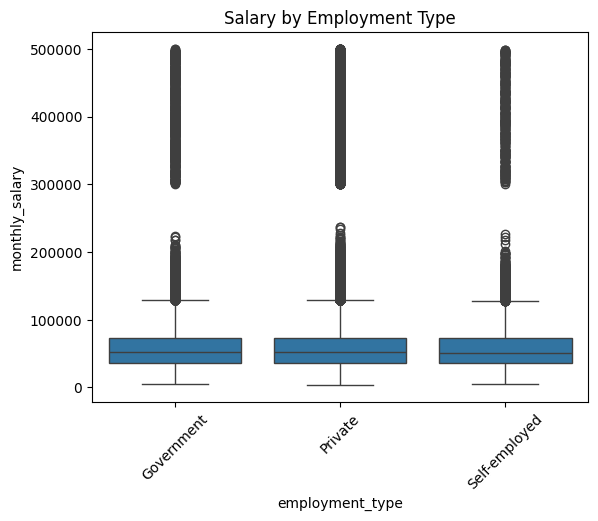

In [14]:
sns.boxplot(x='employment_type', y='monthly_salary', data=df)
plt.title("Salary by Employment Type")
plt.xticks(rotation=45)
plt.show()

Chart - 7. Company Type vs Monthly Salary

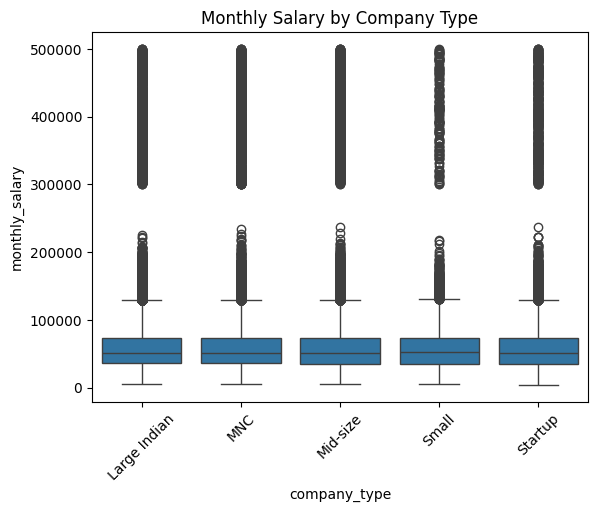

In [15]:
sns.boxplot(x='company_type', y='monthly_salary', data=df)
plt.title("Monthly Salary by Company Type")
plt.xticks(rotation=45)
plt.show()

Chart - 8. House Type Distribution

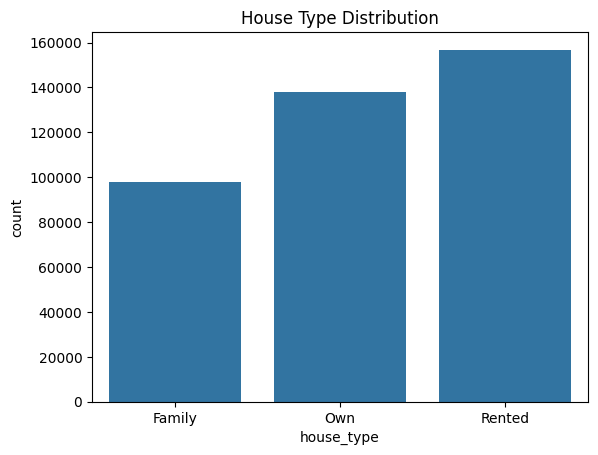

In [16]:
sns.countplot(x='house_type', data=df)
plt.title("House Type Distribution")
plt.show()

Chart - 9. Monthly Rent Distribution

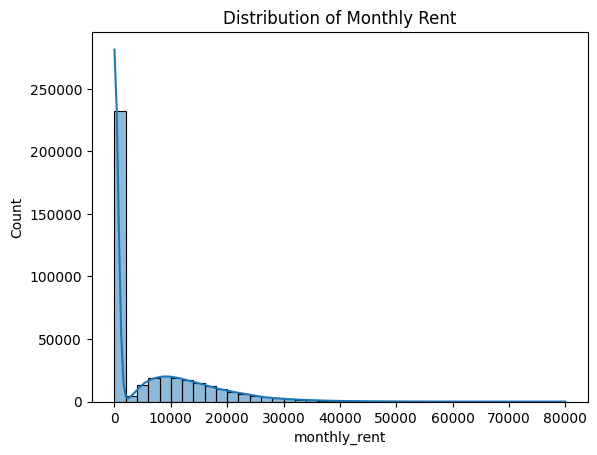

In [17]:
sns.histplot(df['monthly_rent'], bins=40, kde=True)
plt.title("Distribution of Monthly Rent")
plt.show()

Chart 10. Family Size Distribution

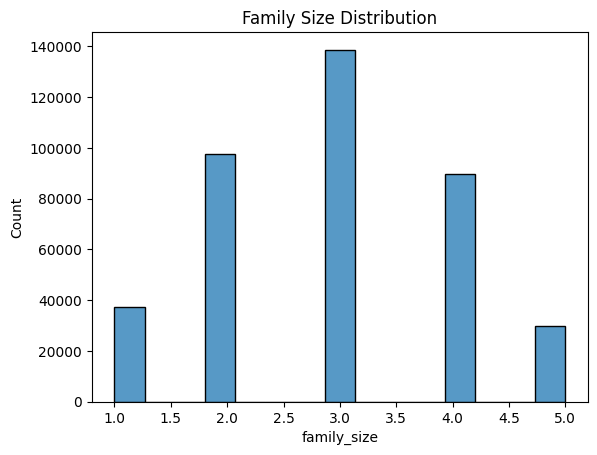

In [18]:
sns.histplot(df['family_size'], bins=15, kde=False)
plt.title("Family Size Distribution")
plt.show()

Chart - 11. Dependents Distribution

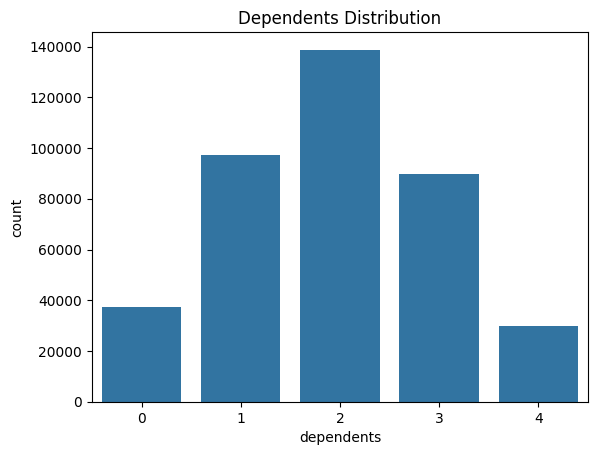

In [19]:
sns.countplot(x='dependents', data=df)
plt.title("Dependents Distribution")
plt.show()

Chart - 12. Credit Score Distribution

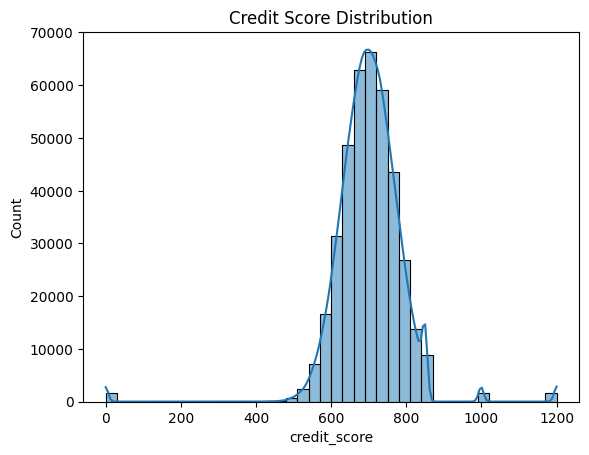

In [20]:
sns.histplot(df['credit_score'], bins=40, kde=True)
plt.title("Credit Score Distribution")
plt.show()

Chart - 13. Correlation Heatmap

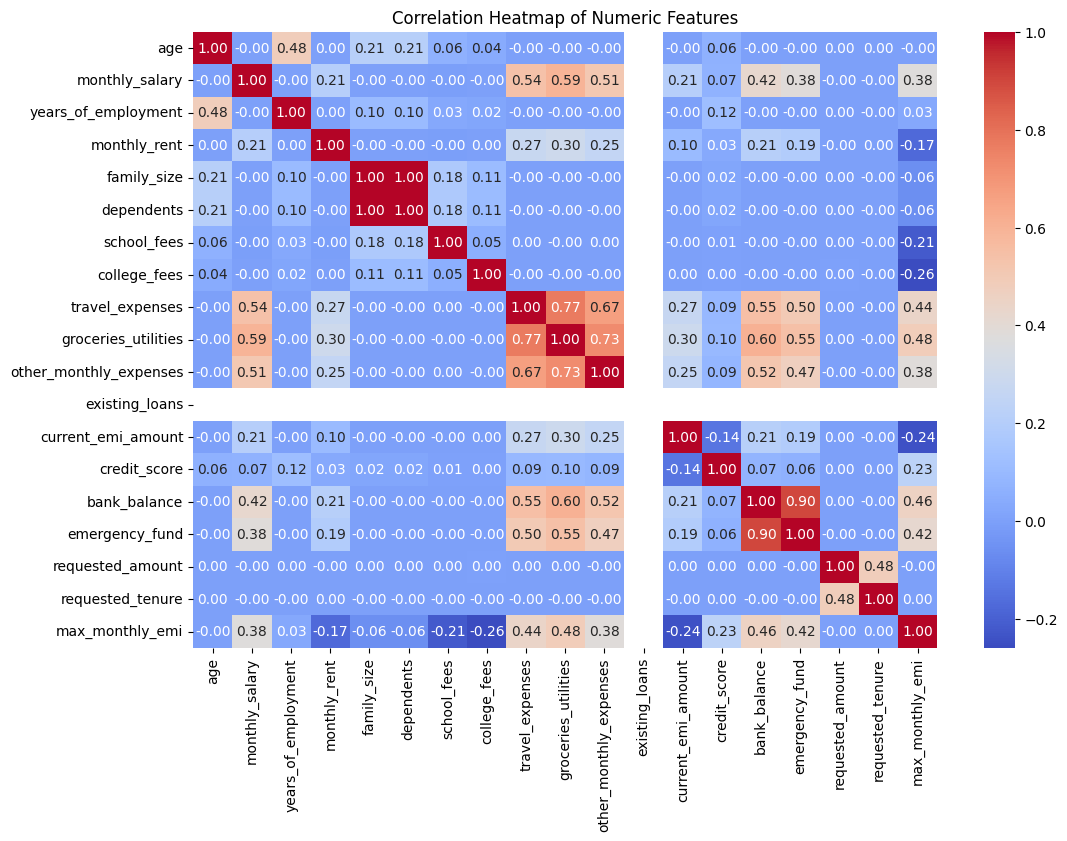

In [21]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Chart - 14. Requested Amount and EMI Eligibility

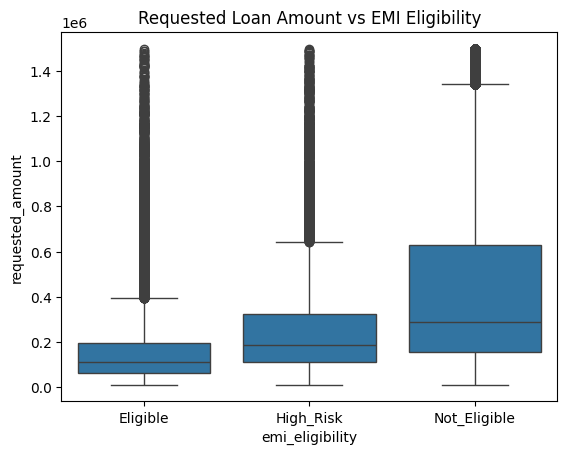

In [22]:
sns.boxplot(x='emi_eligibility', y='requested_amount', data=df)
plt.title("Requested Loan Amount vs EMI Eligibility")
plt.show()

Chart - 15. Credit Score and Max Monhly EMI

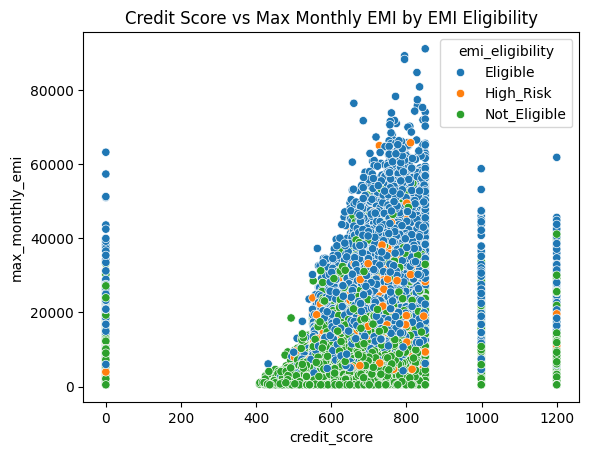

In [23]:
sns.scatterplot(x='credit_score', y='max_monthly_emi', hue='emi_eligibility', data=df)
plt.title("Credit Score vs Max Monthly EMI by EMI Eligibility")
plt.show()

Chart - 16. Income vs Expense

See how much of a person’s salary goes toward essential vs. discretionary spending.

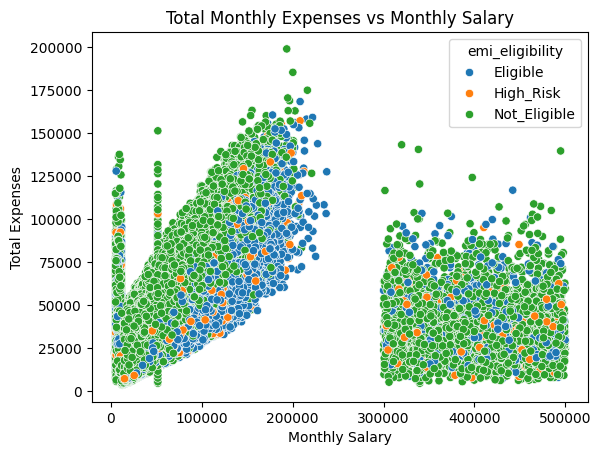

In [24]:
df['total_expenses'] = (
    df['school_fees'] + df['college_fees'] +
    df['travel_expenses'] + df['groceries_utilities'] +
    df['other_monthly_expenses'] + df['current_emi_amount']
)

sns.scatterplot(x='monthly_salary', y='total_expenses', hue='emi_eligibility', data=df)
plt.title("Total Monthly Expenses vs Monthly Salary")
plt.xlabel("Monthly Salary")
plt.ylabel("Total Expenses")
plt.show()

Chart - 17. Debt-toIncome (DTI) Ratio

Key metric for loan analysis — higher DTI usually means higher risk.

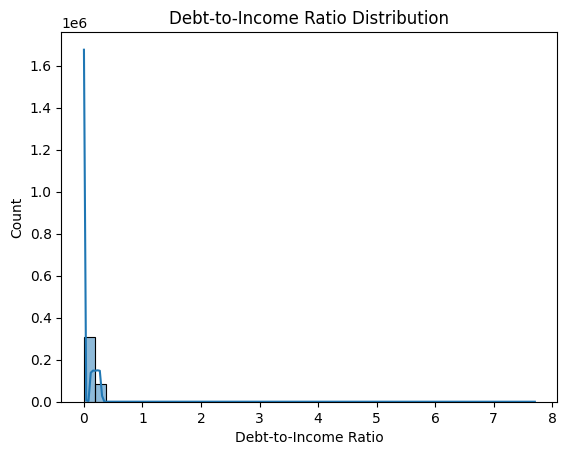

In [25]:
df['debt_to_income'] = (df['current_emi_amount'] / df['monthly_salary']).replace([np.inf, -np.inf], np.nan)
sns.histplot(df['debt_to_income'], bins=40, kde=True)
plt.title("Debt-to-Income Ratio Distribution")
plt.xlabel("Debt-to-Income Ratio")
plt.show()

Chart - 18. Loan Request vs Credit Score

Shows how credit score influences the loan amount requested.

C:\Users\artis\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


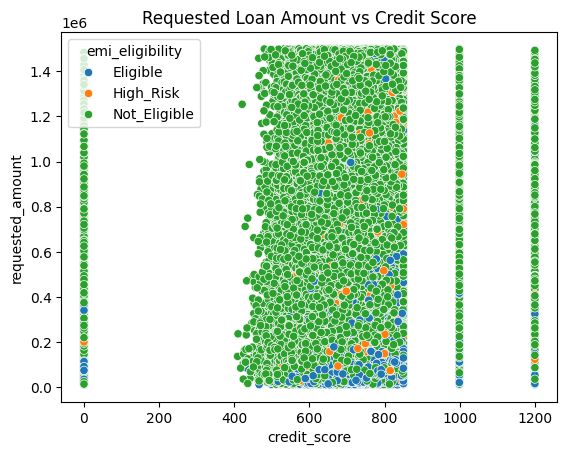

In [26]:
sns.scatterplot(x='credit_score', y='requested_amount', hue='emi_eligibility', data=df)
plt.title("Requested Loan Amount vs Credit Score")
plt.show()

Chart - 19. Emergency Fund vs. EMI Eligibility

See if people with emergency savings are more likely to be EMI eligible.

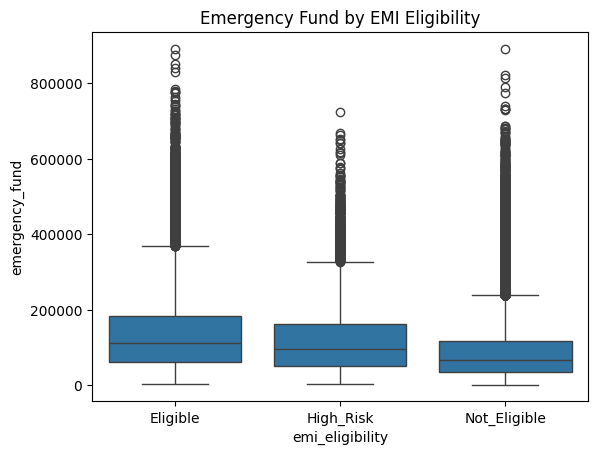

In [27]:
sns.boxplot(x='emi_eligibility', y='emergency_fund', data=df)
plt.title("Emergency Fund by EMI Eligibility")
plt.show()

Chart - 20. Employment Duration vs. Credit Score

Job stability often correlates with creditworthiness.

C:\Users\artis\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


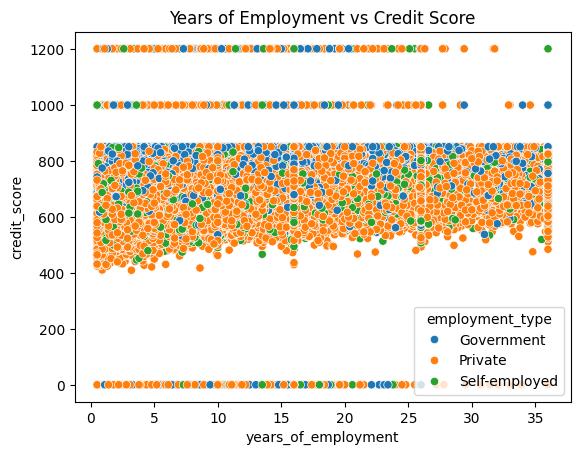

In [28]:
sns.scatterplot(x='years_of_employment', y='credit_score', hue='employment_type', data=df)
plt.title("Years of Employment vs Credit Score")
plt.show()

Chart - 21. Feature Importance

After building a simple model, visualize which features matter most.

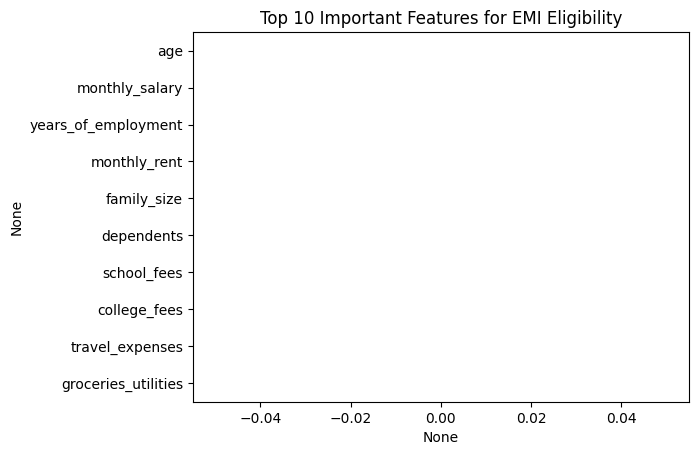

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Example (binary EMI eligibility: Yes/No)
# df_model = df.select_dtypes(include=[np.number]).dropna()
# y = (df['emi_eligibility'].astype(str).str.lower() == 'yes').astype(int)

# model = RandomForestClassifier(random_state=42)
# model.fit(df_model, y)

# importances = pd.Series(model.feature_importances_, index=df_model.columns).sort_values(ascending=False)
# sns.barplot(x=importances[:10], y=importances.index[:10])
# plt.title("Top 10 Important Features for EMI Eligibility")
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.show()

df_model = df.select_dtypes(include=[np.number])
df_model = df_model.fillna(df_model.median())

y = (df['emi_eligibility'].astype(str).str.lower() == 'yes').astype(int)

# Align X and y to avoid mismatch
X, y = df_model.align(y, join='inner', axis=0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features for EMI Eligibility")
plt.show()

Chart - 22. Pairplot of Key Financial Features

Shows multivariate relationships between key numeric variables.

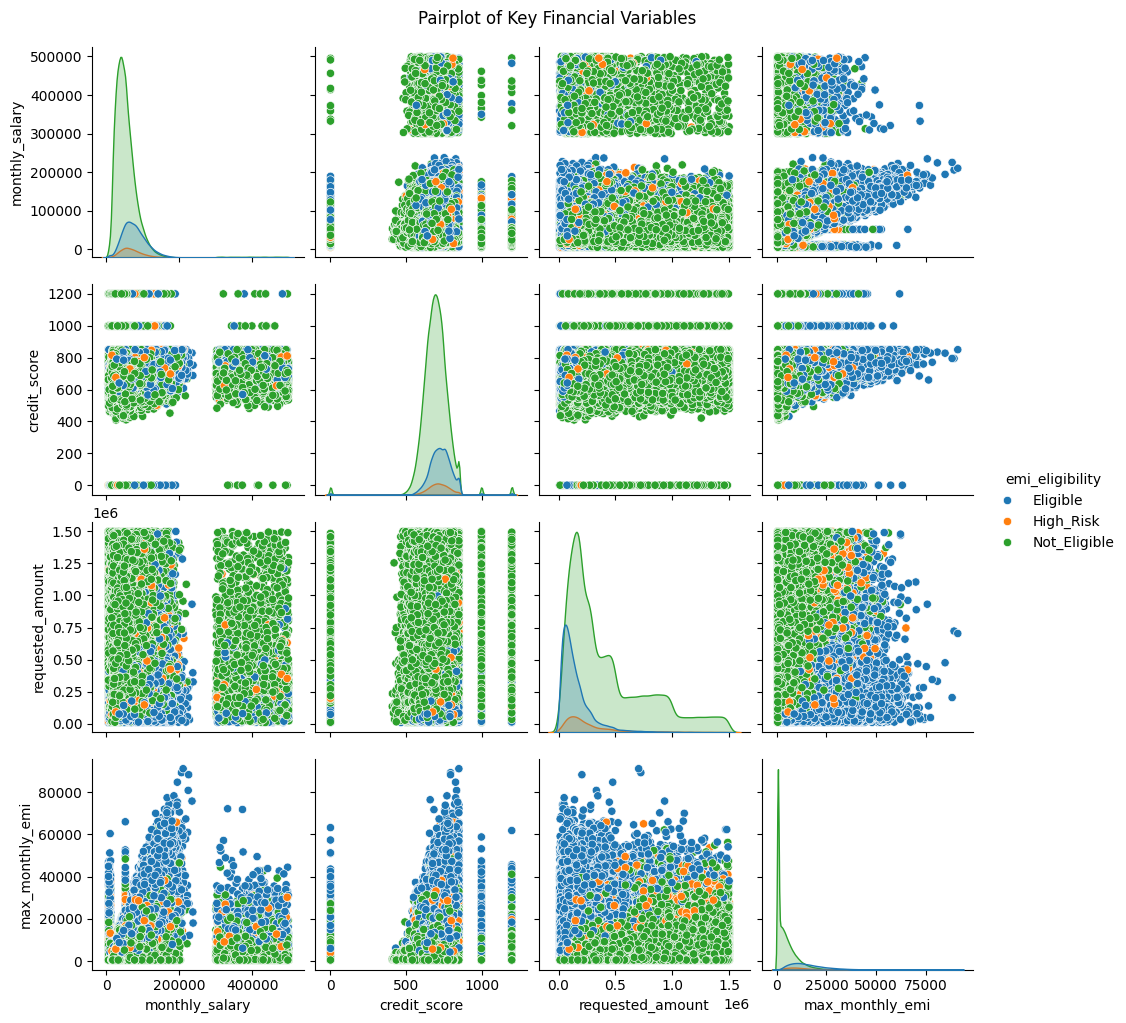

In [30]:
sns.pairplot(df, vars=['monthly_salary', 'credit_score', 'requested_amount', 'max_monthly_emi'], hue='emi_eligibility')
plt.suptitle("Pairplot of Key Financial Variables", y=1.02)
plt.show()

### Feature Engineering

In [32]:
# ✅ Total Monthly Expenses
df['total_monthly_expenses'] = (
    df[['school_fees', 'college_fees', 'travel_expenses',
        'groceries_utilities', 'other_monthly_expenses',
        'current_emi_amount', 'monthly_rent']]
    .sum(axis=1)
)

# ✅ Disposable Income
df['disposable_income'] = df['monthly_salary'] - df['total_monthly_expenses']

# ✅ Debt-to-Income Ratio (DTI)
df['debt_to_income_ratio'] = df['current_emi_amount'] / df['monthly_salary']

# ✅ Expense-to-Income Ratio
df['expense_to_income_ratio'] = df['total_monthly_expenses'] / df['monthly_salary']

# ✅ Savings Ratio (Emergency Fund / Salary)
df['savings_ratio'] = df['emergency_fund'] / df['monthly_salary']

# ✅ Bank Balance to Salary Ratio
df['bank_balance_ratio'] = df['bank_balance'] / df['monthly_salary']

# ✅ Credit Score per Income Unit
df['credit_to_income_ratio'] = df['credit_score'] / df['monthly_salary']

# ✅ Loan Request as a % of Max EMI
df['loan_to_max_emi_ratio'] = df['requested_amount'] / (df['max_monthly_emi'] * df['requested_tenure'])

# ✅ Years of Employment Normalized (e.g., as log scale)
df['log_years_employed'] = np.log1p(df['years_of_employment'])

# ✅ Financial Stability Score (a composite index)
df['financial_stability_score'] = (
    (df['savings_ratio'].fillna(0) * 0.4) +
    ((1 - df['debt_to_income_ratio'].fillna(0)) * 0.3) +
    (df['credit_score'].fillna(0) / 900 * 0.3)
)

# ---- Step 3: Replace infinite or missing engineered values ----
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df.fillna(0, inplace=True)

# ---- Step 4: Save the engineered dataset ----
df.to_csv("engineered_financial_data.csv", index=False)

print("✅ Feature engineering complete! New columns added:")
print([
    'total_monthly_expenses', 'disposable_income', 'debt_to_income_ratio',
    'expense_to_income_ratio', 'savings_ratio', 'bank_balance_ratio',
    'credit_to_income_ratio', 'loan_to_max_emi_ratio', 'log_years_employed',
    'financial_stability_score'
])

✅ Feature engineering complete! New columns added:
['total_monthly_expenses', 'disposable_income', 'debt_to_income_ratio', 'expense_to_income_ratio', 'savings_ratio', 'bank_balance_ratio', 'credit_to_income_ratio', 'loan_to_max_emi_ratio', 'log_years_employed', 'financial_stability_score']


### Load Prepared Data

In [57]:
ndf = pd.read_csv("engineered_financial_data.csv")
ndf.info()
print(ndf.columns.tolist()) # List all column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392920 entries, 0 to 392919
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age                        392920 non-null  float64
 1   gender                     392920 non-null  object 
 2   marital_status             392920 non-null  object 
 3   education                  392920 non-null  object 
 4   monthly_salary             392920 non-null  float64
 5   employment_type            392920 non-null  object 
 6   years_of_employment        392920 non-null  float64
 7   company_type               392920 non-null  object 
 8   house_type                 392920 non-null  object 
 9   monthly_rent               392920 non-null  float64
 10  family_size                392920 non-null  int64  
 11  dependents                 392920 non-null  int64  
 12  school_fees                392920 non-null  float64
 13  college_fees               39

### Model Development

In [61]:
# ==============================================================
# MODEL DEVELOPMENT: EMI Eligibility Prediction (with NaN handling)
# ==============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)
from sklearn.preprocessing import label_binarize

# Existing loans have Nan Values
# df.drop('existing_loans', axis=1, inplace=True)

# 2️⃣ Encode target variable
df['emi_eligibility'] = df['emi_eligibility'].astype(str).str.lower()
label_encoder = LabelEncoder()
df['emi_eligibility_encoded'] = label_encoder.fit_transform(df['emi_eligibility'])

# 3️⃣ Define features and target
target = 'emi_eligibility_encoded'
X = df.select_dtypes(include=[np.number]).drop(columns=[target], errors='ignore')

# Define your selected features
selected_features = [
    'monthly_salary',
    'credit_score',
    'years_of_employment',
    'monthly_rent',
    'current_emi_amount',
    'groceries_utilities',
    'travel_expenses',
    'other_monthly_expenses',
    'emergency_fund',
    'bank_balance'
]

X = df[selected_features]

y_class = df[target]         # Classification target
y_reg = df['max_monthly_emi']           # Regression target

# ✅ Handle missing values
X = X.fillna(0)
y_class = y_class.fillna('not_eligible')
y_reg = y_reg.fillna(0)

# print("Remaining NaNs:", X.isna().sum())
# print(df['emi_eligibility'].unique())


In [62]:
# ✅ FIX: Handle missing numeric data before training
X = X.fillna(X.median())  # fills all NaNs with median of each column


# ✅ Train/Test Split
X_train, X_test, y_train, y_test, y_reg_train, y_reg_test = train_test_split(
    X, y, y_reg, test_size=0.2, random_state=42, stratify=y_class
)

# 5️⃣ Scale numeric features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42,
        use_label_encoder=False, eval_metric='logloss'
    )
}

# 7️⃣ Train, predict, and evaluate
results = []

for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    # For multiclass metrics
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # ROC-AUC (multiclass, using one-vs-rest)
    # Only works if model supports predict_proba
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    y_prob = model.predict_proba(X_test if name != "Logistic Regression" else X_test_scaled)
    roc = roc_auc_score(y_test_bin, y_prob, average='weighted', multi_class='ovr')

    acc = accuracy_score(y_test, y_pred)

    results.append({
    "Model": name,
    "Accuracy": round(acc, 4),
    "Precision": round(prec, 4),
    "Recall": round(rec, 4),
    "F1": round(f1, 4),
    "ROC_AUC": round(roc, 4)
})

# 8️⃣ Compare results
results_df = pd.DataFrame(results)
print("\n✅ Model Performance Comparison:\n")
print(results_df.sort_values(by='ROC_AUC', ascending=False).reset_index(drop=True))

# 9️⃣ Detailed classification report for best model
best_model_name = results_df.loc[results_df['ROC_AUC'].idxmax(), 'Model']
print(f"\n🔍 Best Model: {best_model_name}\n")
best_model = models[best_model_name]
if best_model_name == "Logistic Regression":
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

C:\Users\artis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\artis\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\artis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



✅ Model Performance Comparison:

                 Model  Accuracy  Precision  Recall      F1  ROC_AUC
0              XGBoost    0.8091     0.7580  0.8091  0.7759   0.8355
1        Random Forest    0.8099     0.8022  0.8099  0.7780   0.8296
2  Logistic Regression    0.7979     0.7420  0.7979  0.7569   0.7992

🔍 Best Model: XGBoost

              precision    recall  f1-score   support

    eligible       0.61      0.39      0.48     14450
   high_risk       0.00      0.00      0.00      3393
not_eligible       0.84      0.95      0.89     60741

    accuracy                           0.81     78584
   macro avg       0.48      0.45      0.46     78584
weighted avg       0.76      0.81      0.78     78584



C:\Users\artis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\artis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\artis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [63]:

import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    r2_score,
    mean_absolute_error
)

# Find best model based on F1 or Accuracy
best_model_name = results_df.loc[results_df['F1'].idxmax(), 'Model']
best_model = models[best_model_name]

# Retrain best model on full dataset
# best_model.fit(X_train, y_train)
best_model.fit(X_train_scaled, y_train)


# Train Regression Model
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_scaled, y_reg_train)

y_pred_class = best_model.predict(X_test_scaled)
print("🎯 Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

# ✅ Evaluate Regression
y_pred_reg = reg_model.predict(X_test_scaled)
print("\n💰 Regression R² Score:", r2_score(y_reg_test, y_pred_reg))
print("MAE:", mean_absolute_error(y_reg_test, y_pred_reg))

# ✅ Save models and scaler
joblib.dump(best_model, "emi_classifier.joblib")
joblib.dump(reg_model, "emi_regressor.joblib")
joblib.dump(scaler, "scaler.joblib")

print("\n✅ Models and scaler saved successfully!")



🎯 Classification Accuracy: 0.809986765753843

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.39      0.48     14450
           1       1.00      0.01      0.03      3393
           2       0.84      0.95      0.89     60741

    accuracy                           0.81     78584
   macro avg       0.82      0.45      0.47     78584
weighted avg       0.80      0.81      0.78     78584


💰 Regression R² Score: 0.8108771810228225
MAE: 2453.541133212868

✅ Models and scaler saved successfully!


### MLflow Integration

In [51]:
import mlflow
import mlflow.sklearn

with mlflow.start_run():
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    mlflow.log_param("model_type", "RandomForest")
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(model, "rf_model")

C:\Users\artis\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)


KeyboardInterrupt: 

### Model Interpretability

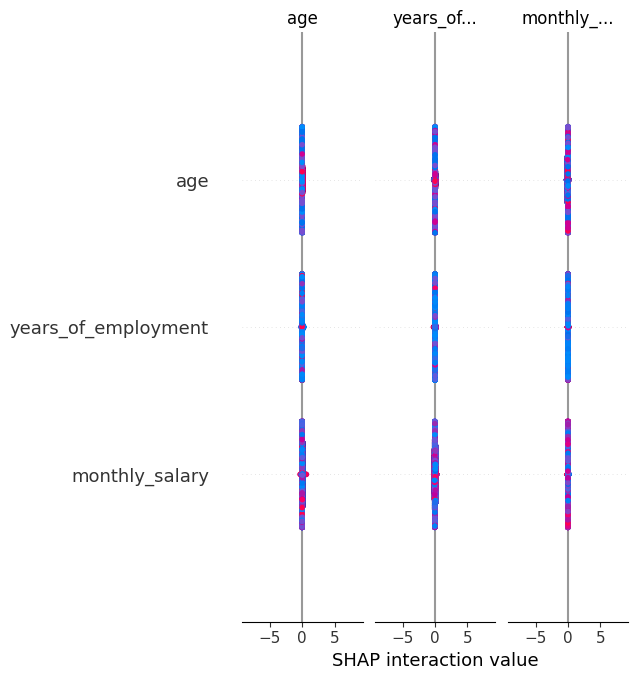

In [53]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)